In [104]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Bio import Entrez

In [99]:
# Explanation of interpretation
#subm_summary = pd.read_csv("/mnt/c/Users/ashleyconard/Downloads/submission_summary.txt", sep="\t", skiprows=15, header=0)
#count = (~subm_summary['ExplanationOfInterpretation'].str.contains('-')).sum()

gencc_s = pd.read_csv("/home/azureuser/submissions-export-csv", header=0) # skiprows=15
out_dir = "/home/azureuser/gencc_summaries/"
gencc_s.shape


(21668, 30)

In [100]:
# Replace submitted_as_pmids column blank values with NaN
gencc_s['submitted_as_pmids'] = gencc_s['submitted_as_pmids'].replace('', np.nan)
    
# Remove rows where 'submitted_as_pmids' is NaN
gencc_s = gencc_s.dropna(subset=['submitted_as_pmids'])

# Replace all occurrences of 'LIMITED' with 'Limited' and 'Definitive ' with 'Definitive'
gencc_s['submitted_as_classification_name'] = gencc_s['submitted_as_classification_name'].replace({'LIMITED': 'Limited', 'Definitive ': 'Definitive', 'Modeare': 'Moderate', ' Moderate': 'Moderate', 'Moderate ': 'Moderate', 'Disputed evidence': 'Disputed Evidence', 'Disputed': 'Disputed Evidence', 'STRONG': 'Strong', 'Strong ': 'Strong', ' Strong': 'Strong'})

gencc_s.shape


(13907, 30)

In [102]:
# Split the 'submitted_as_pmids' column on ','
gencc_s['submitted_as_pmids'] = gencc_s['submitted_as_pmids'].str.split(',')

# Use explode to have each number appear on a separate row
gencc_s = gencc_s.explode('submitted_as_pmids').reset_index(drop=True)

# Print the DataFrame
print(gencc_s.shape)

gencc_s.head()


(41557, 30)


,uuid,gene_curie,gene_symbol,disease_curie,disease_title,disease_original_curie,disease_original_title,classification_curie,classification_title,moi_curie,...,submitted_as_submitter_name,submitted_as_classification_id,submitted_as_classification_name,submitted_as_date,submitted_as_public_report_url,submitted_as_notes,submitted_as_pmids,submitted_as_assertion_criteria_url,submitted_as_submission_id,submitted_run_date
0,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,Genomics England PanelApp,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,24939586,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08
1,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,Genomics England PanelApp,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,25862627,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08
2,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,Genomics England PanelApp,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,27942422,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08
3,GENCC_000104-HGNC_1097-OMIM_613707-HP_0000006-...,HGNC:1097,BRAF,MONDO:0013380,LEOPARD syndrome 3,OMIM:613707,LEOPARD syndrome 3,GENCC:100002,Strong,HP:0000006,...,Genomics England PanelApp,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,19206169,NaN,000104.pa48.v1.73.hgnc1097.m1.p1,2020-10-08
4,GENCC_000104-HGNC_1097-OMIM_613707-HP_0000006-...,HGNC:1097,BRAF,MONDO:0013380,LEOPARD syndrome 3,OMIM:613707,LEOPARD syndrome 3,GENCC:100002,Strong,HP:0000006,...,Genomics England PanelApp,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,21396583,NaN,000104.pa48.v1.73.hgnc1097.m1.p1,2020-10-08


In [114]:
def get_pub_year(pmid):
    Entrez.email = "ashleyconard@microsoft.com"  # Always tell NCBI who you are
    handle = Entrez.efetch(db="pubmed", id=pmid, retmode="xml", rettype="abstract")
    records = Entrez.read(handle)
    if records:
        year = records['PubmedArticle'][0]['PubmedData']['History'][-1]['Year']
        return year
    else:
        return "No records found for this PMID"

pmid = "24939586" 
print(get_pub_year(pmid))

# Example records['PubmedArticle'][0]['PubmedData']['History']

#history_pubmed = [DictElement({'Year': '2016', 'Month': '6', 'Day': '17'}, attributes={'PubStatus': 'received'}), DictElement({'Year': '2017', 'Month': '1', 'Day': '16'}, attributes={'PubStatus': 'accepted'}), DictElement({'Year': '2017', 'Month': '1', 'Day': '21', 'Hour': '6', 'Minute': '0'}, attributes={'PubStatus': 'pubmed'}), DictElement({'Year': '2017', 'Month': '7', 'Day': '1', 'Hour': '6', 'Minute': '0'}, attributes={'PubStatus': 'medline'}), DictElement({'Year': '2017', 'Month': '1', 'Day': '21', 'Hour': '6', 'Minute': '0'}, attributes={'PubStatus': 'entrez'})]


2015


In [115]:
# Apply the get_pub_year function to every row value in the 'submitted_as_pmids' column
test_gencc['pub_year'] = test_gencc['submitted_as_pmids'].apply(get_pub_year)

In [116]:
test_gencc

,uuid,gene_curie,gene_symbol,disease_curie,disease_title,disease_original_curie,disease_original_title,classification_curie,classification_title,moi_curie,...,submitted_as_classification_id,submitted_as_classification_name,submitted_as_date,submitted_as_public_report_url,submitted_as_notes,submitted_as_pmids,submitted_as_assertion_criteria_url,submitted_as_submission_id,submitted_run_date,pub_year
0,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,24939586,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08,2015
1,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,25862627,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08,2015
2,GENCC_000104-HGNC_23336-MONDO_0018997-HP_00000...,HGNC:23336,A2ML1,MONDO:0018997,Noonan syndrome,MONDO:0018997,Noonan syndrome,GENCC:100004,Limited,HP:0000006,...,GENCC:100004,Limited,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,27942422,NaN,000104.pa48.v1.73.hgnc23336.m1.p1,2020-10-08,2016
3,GENCC_000104-HGNC_1097-OMIM_613707-HP_0000006-...,HGNC:1097,BRAF,MONDO:0013380,LEOPARD syndrome 3,OMIM:613707,LEOPARD syndrome 3,GENCC:100002,Strong,HP:0000006,...,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,19206169,NaN,000104.pa48.v1.73.hgnc1097.m1.p1,2020-10-08,2009
4,GENCC_000104-HGNC_1097-OMIM_613707-HP_0000006-...,HGNC:1097,BRAF,MONDO:0013380,LEOPARD syndrome 3,OMIM:613707,LEOPARD syndrome 3,GENCC:100002,Strong,HP:0000006,...,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,21396583,NaN,000104.pa48.v1.73.hgnc1097.m1.p1,2020-10-08,2011
5,GENCC_000104-HGNC_1097-OMIM_115150-HP_0000006-...,HGNC:1097,BRAF,MONDO:0007265,cardiofaciocutaneous syndrome 1,OMIM:115150,Cardiofaciocutaneous syndrome,GENCC:100002,Strong,HP:0000006,...,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,19206169,NaN,000104.pa48.v1.73.hgnc1097.m1.p2,2020-10-08,2009
6,GENCC_000104-HGNC_1097-OMIM_115150-HP_0000006-...,HGNC:1097,BRAF,MONDO:0007265,cardiofaciocutaneous syndrome 1,OMIM:115150,Cardiofaciocutaneous syndrome,GENCC:100002,Strong,HP:0000006,...,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,21396583,NaN,000104.pa48.v1.73.hgnc1097.m1.p2,2020-10-08,2011
7,GENCC_000104-HGNC_1097-OMIM_613706-HP_0000006-...,HGNC:1097,BRAF,MONDO:0013379,Noonan syndrome 7,OMIM:613706,Noonan syndrome 7,GENCC:100002,Strong,HP:0000006,...,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,19206169,NaN,000104.pa48.v1.73.hgnc1097.m1.p3,2020-10-08,2009
8,GENCC_000104-HGNC_1097-OMIM_613706-HP_0000006-...,HGNC:1097,BRAF,MONDO:0013379,Noonan syndrome 7,OMIM:613706,Noonan syndrome 7,GENCC:100002,Strong,HP:0000006,...,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,21396583,NaN,000104.pa48.v1.73.hgnc1097.m1.p3,2020-10-08,2011
9,GENCC_000104-HGNC_1541-OMIM_613563-HP_0000006-...,HGNC:1541,CBL,MONDO:0013308,CBL-related disorder,OMIM:613563,Noonan syndrome-like disorder with or without ...,GENCC:100002,Strong,HP:0000006,...,GENCC:100002,Strong,2020-10-07 20:04:14,https://panelapp.genomicsengland.co.uk/panels/48/,NaN,20619386,NaN,000104.pa48.v1.73.hgnc1541.m1.p1,2020-10-08,2010


/tmp/ipykernel_3524870/437446020.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='submitted_as_classification_name', y='unique_disease_count', data=grouped_df, palette=color_dict)


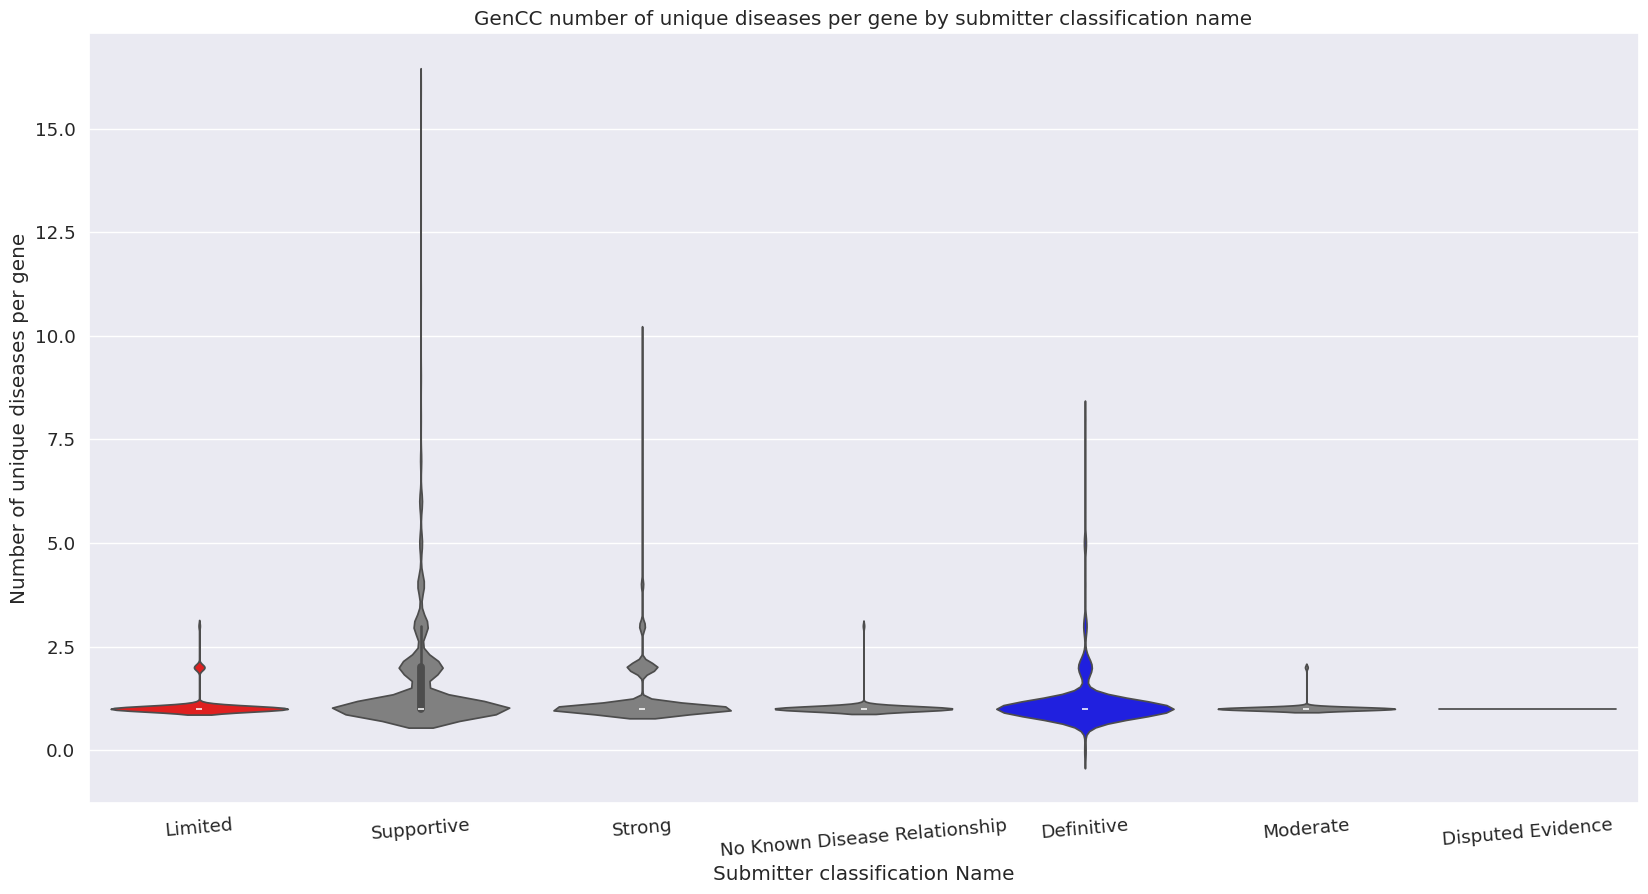

In [117]:
def create_palette(data, colors):
    unique_categories = data['submitted_as_classification_name'].unique()
    palette = {}
    for category in unique_categories:
        if category in colors:
            palette[category] = colors[category]
        else:
            palette[category] = 'grey'  # Default color
    return palette

# Increase the default font size
sns.set(font_scale=1.2)

# Group by 'gene_symbol' and 'submitted_as_classification_name', and count unique 'disease_title'
grouped_df = gencc_s.groupby(['gene_symbol', 'submitted_as_classification_name'])['disease_title'].nunique().reset_index(name='unique_disease_count')

color_dict = create_palette(grouped_df, {'Limited': 'red', 'Definitive': 'blue'})

plt.figure(figsize=(20, 10))
sns.violinplot(x='submitted_as_classification_name', y='unique_disease_count', data=grouped_df, palette=color_dict)
plt.xticks(rotation=5)
plt.xlabel('Submitter classification Name')
plt.ylabel('Number of unique diseases per gene')
plt.title("GenCC number of unique diseases per gene by submitter classification name")

plt.show()

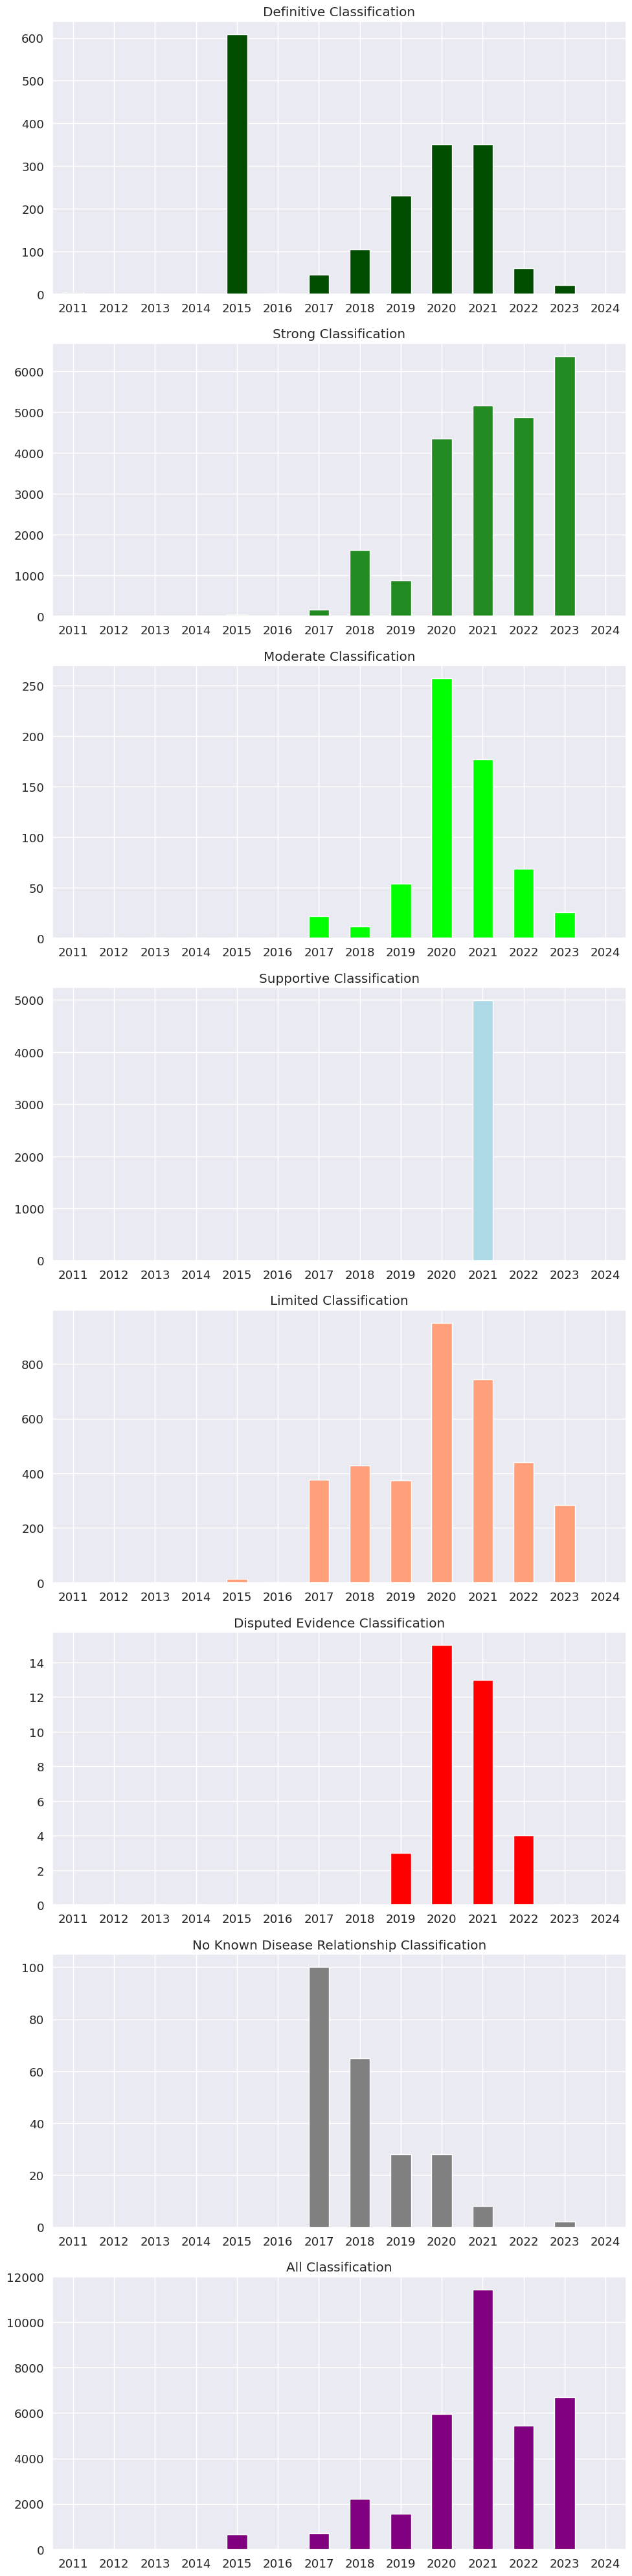

In [121]:
# Convert 'submitted_as_date' to datetime and extract the year
gencc_s['submitted_as_date'] = pd.to_datetime(gencc_s['submitted_as_date'])
gencc_s['year'] = gencc_s['submitted_as_date'].dt.year

# Create a range of years from 2011 to 2024
years = pd.RangeIndex(2011, 2025)

# Remove rows with 'NaN' in 'submitted_as_classification_name' column
gencc_s = gencc_s.dropna(subset=['submitted_as_classification_name'])

# Create a color dictionary
color_dict = {
    'Definitive': (0, 0.3, 0),
    'Strong': 'forestgreen',
    'Moderate': (0, 1, 0),
    'Supportive': 'lightblue',
    'Limited': 'lightsalmon',
    'Disputed Evidence': 'red',
    'No Known Disease Relationship': 'grey'
}

# Create a figure with a subplot for each classification in color_dict plus one for all classifications
fig, axs = plt.subplots(len(color_dict) + 1, 1, figsize=(10, 5*(len(color_dict)+1)))

# Plot a bar plot of the year for each classification in color_dict
for i, classification in enumerate(list(color_dict.keys()) + ['All']):
    if classification == 'All':
        classification_df = gencc_s
        color = 'purple'  # Choose a color for the 'All' category
    else:
        classification_df = gencc_s[gencc_s['submitted_as_classification_name'] == classification]
        color = color_dict.get(classification, 'grey')  # Use color from dictionary if it exists, else use 'grey'
    
    classification_df['year'].value_counts().reindex(years, fill_value=0).sort_index().plot.bar(ax=axs[i], color=color)
    axs[i].set_title(f'{classification} Classification')
    axs[i].set_xticklabels(years, rotation=0)  # Set x-axis tick rotation

plt.tight_layout()
plt.show()

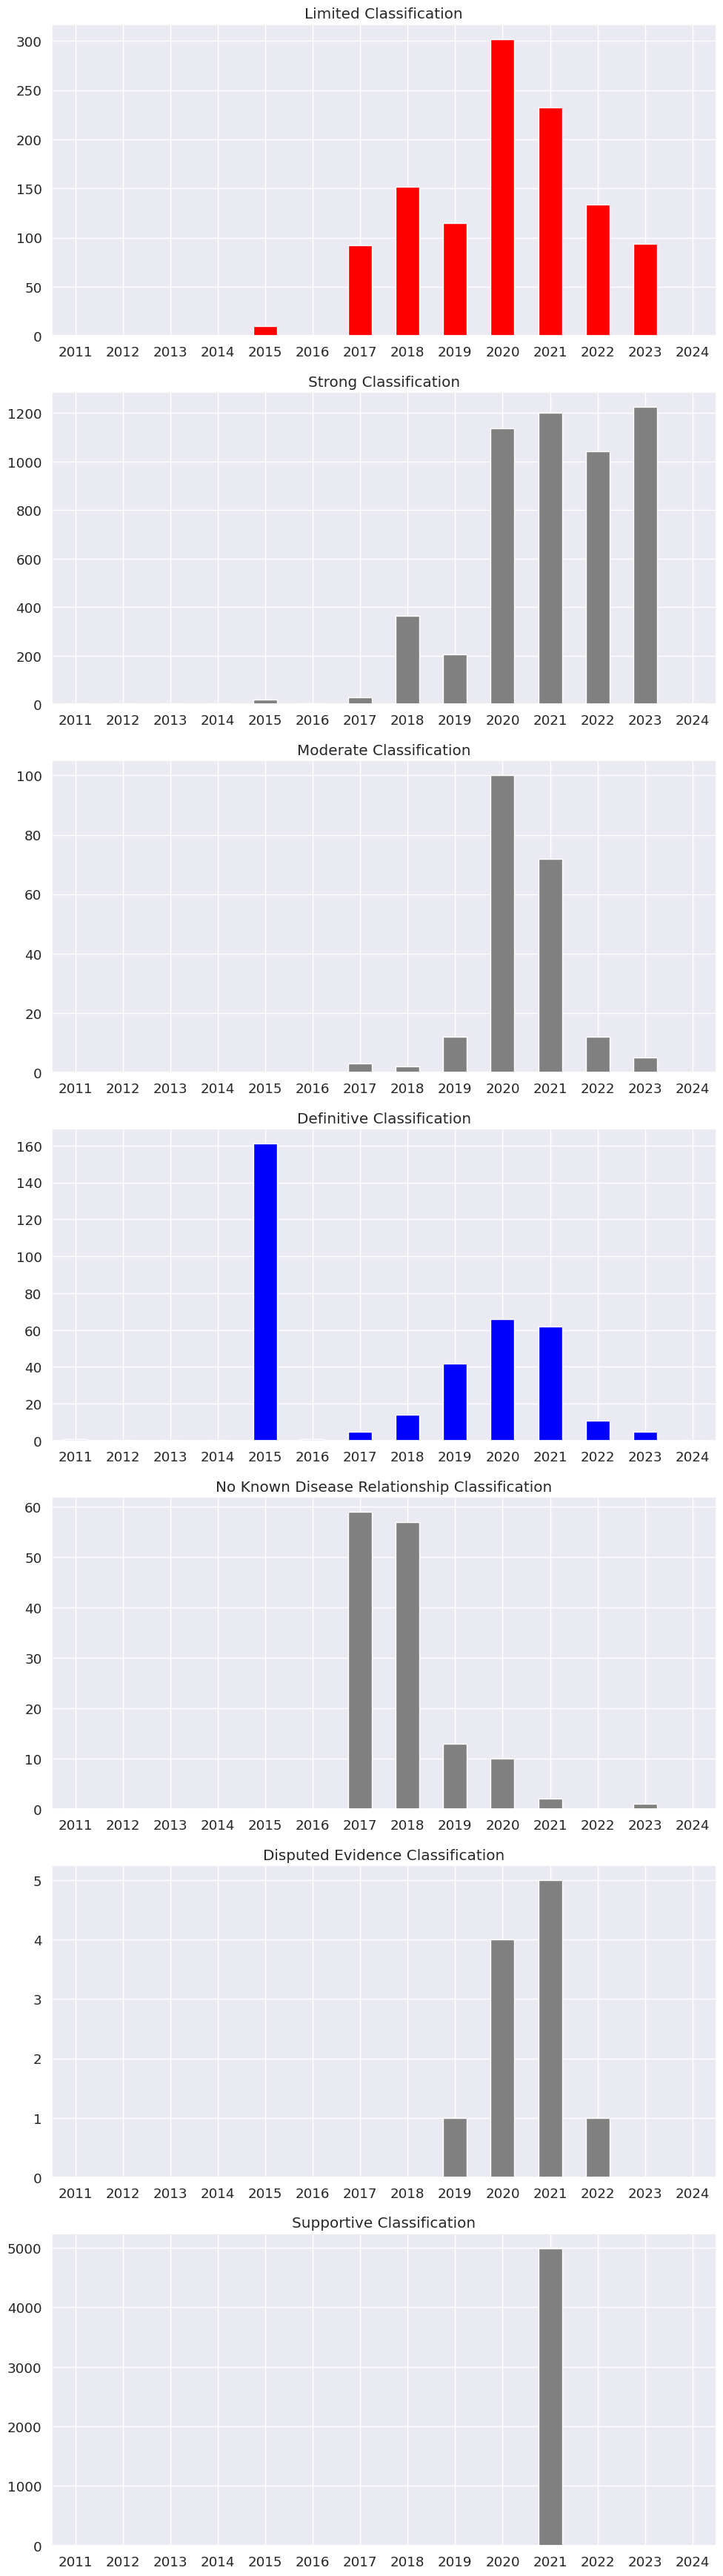

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming gencc_s is your DataFrame and it's already loaded

# Convert 'submitted_as_date' to datetime and extract the year
gencc_s['submitted_as_date'] = pd.to_datetime(gencc_s['submitted_as_date'])
gencc_s['year'] = gencc_s['submitted_as_date'].dt.year

# Create a range of years from 2011 to 2024
years = pd.RangeIndex(2011, 2025)

# Remove rows with 'NaN' in 'submitted_as_classification_name' column
gencc_s = gencc_s.dropna(subset=['submitted_as_classification_name'])

# Get all unique classifications
unique_classifications = gencc_s['submitted_as_classification_name'].unique()

# Create a color dictionary
color_dict = {'Limited': 'red', 'Definitive': 'blue'}

# Create a figure with a subplot for each unique classification
fig, axs = plt.subplots(len(unique_classifications), 1, figsize=(10, 5*len(unique_classifications)))

# Plot a bar plot of the year for each unique classification
for i, classification in enumerate(unique_classifications):
    classification_df = gencc_s[gencc_s['submitted_as_classification_name'] == classification]
    color = color_dict.get(classification, 'grey')  # Use color from dictionary if it exists, else use 'grey'
    classification_df['year'].value_counts().reindex(years, fill_value=0).sort_index().plot.bar(ax=axs[i], color=color)
    axs[i].set_title(f'{classification} Classification')
    axs[i].set_xticklabels(years, rotation=0)  # Set x-axis tick rotation

plt.tight_layout()
plt.show()

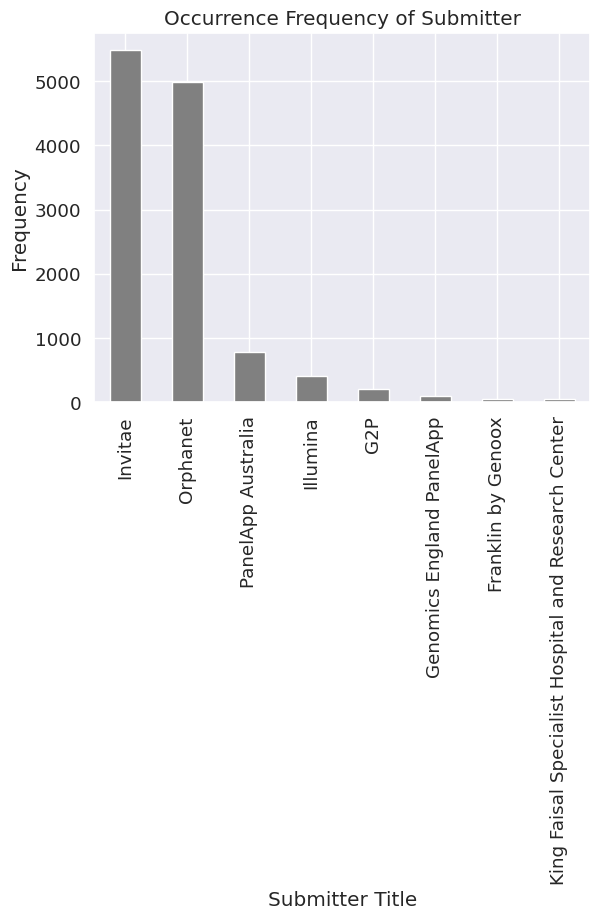

In [11]:
# Plot a histogram of the 'submitter_title' column
gencc_s['submitter_title'].value_counts().plot(kind='bar', color='grey')

plt.title('Occurrence Frequency of Submitter')
plt.xlabel('Submitter Title')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

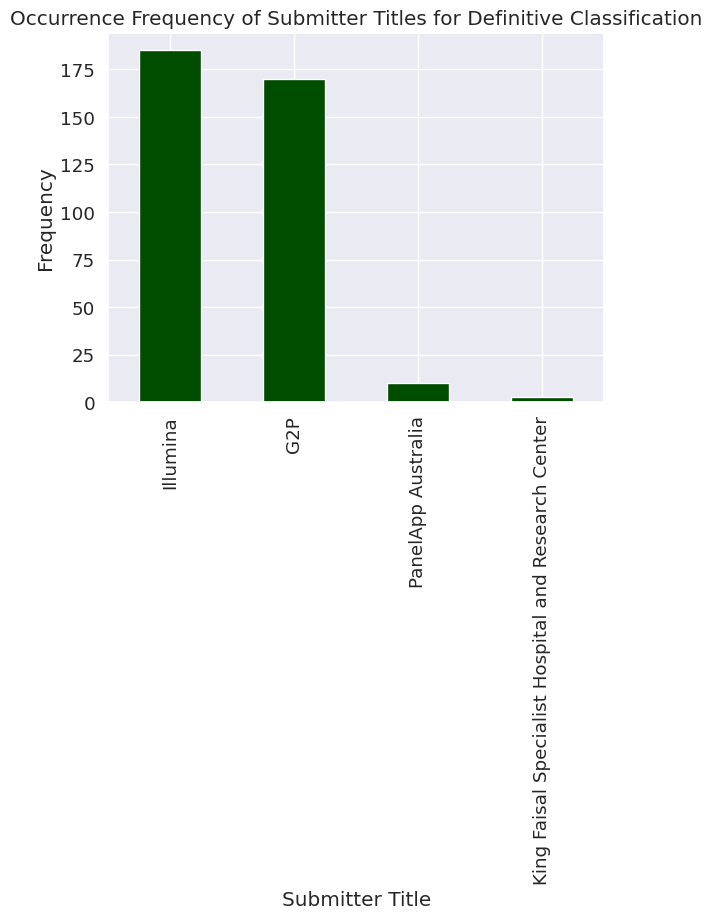

In [24]:
filtered_df = gencc_s[gencc_s['submitted_as_classification_name'].isin(['Definitive'])]

filtered_df['submitter_title'].value_counts().plot(kind='bar', color=(0,0.3,0))

plt.title('Occurrence Frequency of Submitter Titles for Definitive Classification')
plt.xlabel('Submitter Title')
plt.ylabel('Frequency')

plt.show()